1. EDA for Customers.csv

In [1]:
# Step 1: Load the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load the dataset
customers = pd.read_csv('/content/Customers.csv')

In [3]:
# Display the first few rows
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [4]:
# Step 2: Data Overview
print("\nDataset Information:")
print(customers.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [5]:
print("\nNull Values Count:")
print(customers.isnull().sum())


Null Values Count:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [6]:
print("\nSummary Statistics:")
print(customers.describe(include='all'))


Summary Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [11]:
duplicates = customers.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [7]:
# Step 3: Explore Key Columns
# Distribution of Regions
region_counts = customers['Region'].value_counts()
print("\nCustomer Count by Region:")
print(region_counts)


Customer Count by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [8]:
# Signup Trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
print("\nSignup Trends Over Time:")
print(signup_trends)


Signup Trends Over Time:
SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


In [16]:
#Monthly and Seasonal Signup Trends
customers['Month'] = customers['SignupDate'].dt.month
customers['Season'] = customers['SignupDate'].dt.month % 12 // 3 + 1  # 1: Winter, 2: Spring, etc.
monthly_trends = customers['Month'].value_counts().sort_index()
seasonal_trends = customers['Season'].value_counts()

In [17]:
print(monthly_trends)

Month
1     15
2     21
3     20
4     24
5     17
6     12
7     13
8     10
9     21
10    15
11    19
12    13
Name: count, dtype: int64


In [18]:
print(seasonal_trends)

Season
2    61
4    55
1    49
3    35
Name: count, dtype: int64


<ipython-input-9-398b39829807>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


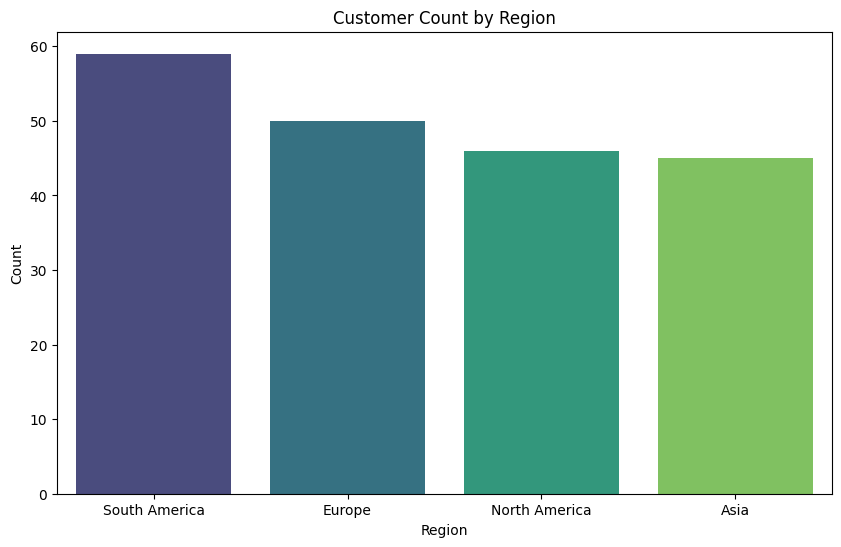

In [9]:
# Step 4: Visualizations
# 1. Bar plot for regions
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Customer Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

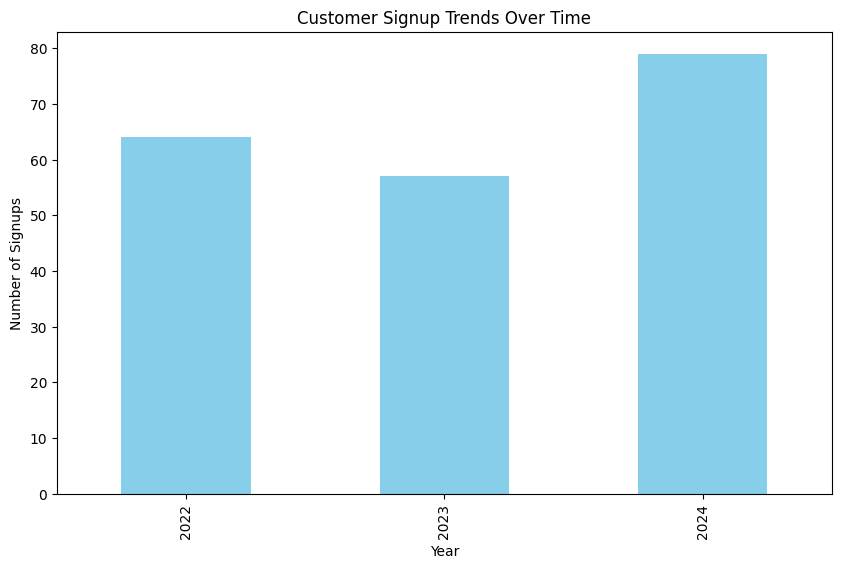

In [10]:
# 2. Signup trends over years
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar', color='skyblue')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

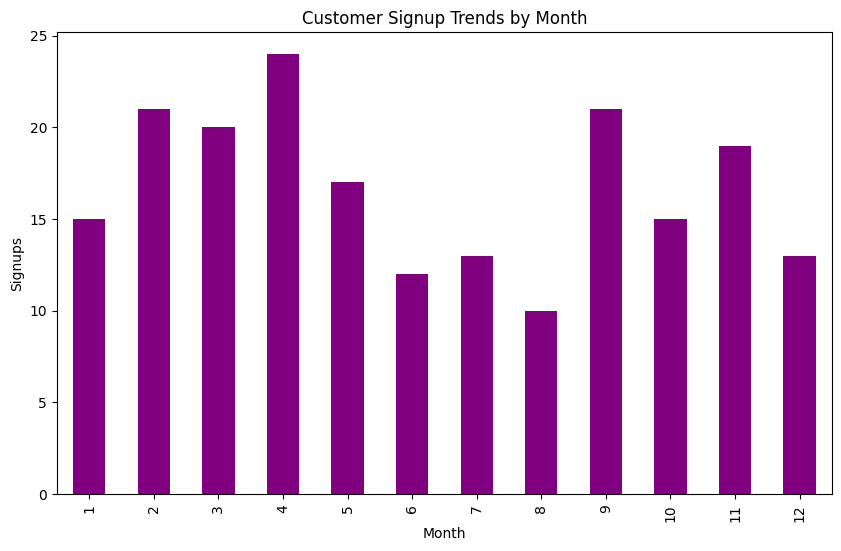

In [19]:
# 3. Monthly trends
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='bar', color='purple')
plt.title('Customer Signup Trends by Month')
plt.xlabel('Month')
plt.ylabel('Signups')
plt.show()

<ipython-input-20-a22b7e6a1b36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_trends.index, y=seasonal_trends.values, palette='coolwarm')


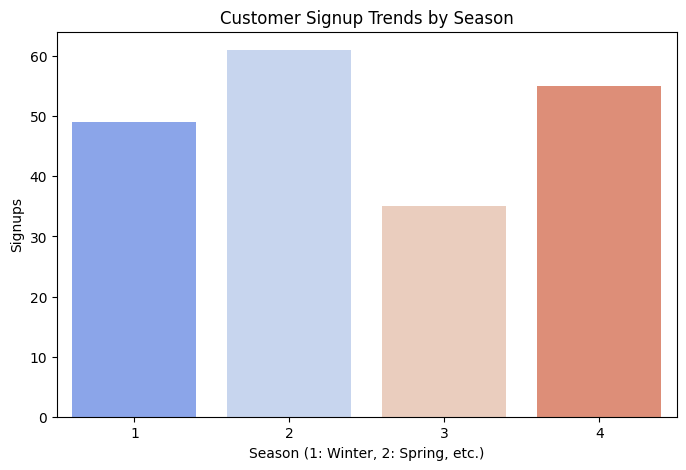

In [20]:
# 4. Seasonal trends
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_trends.index, y=seasonal_trends.values, palette='coolwarm')
plt.title('Customer Signup Trends by Season')
plt.xlabel('Season (1: Winter, 2: Spring, etc.)')
plt.ylabel('Signups')
plt.show()

Insight 1: The majority of customers come from South America region, indicating a strong market presence there.

Insight 2: Customer signups have shown a steady increase over the years, peaking in 2024.

Insight 3: Certain regions have significantly fewer customers, which could be potential areas for market expansion.

Insight 4: Region Asia has significantly fewer customers, indicating potential for targeted marketing.

Insight 5: Signup rates are highest in months April, suggesting these are peak activity periods.

2. EDA for Products.csv

In [28]:
# Load the dataset
products = pd.read_csv('/content/Products.csv')

In [29]:
# Display the first few rows
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [30]:
# Step 2: Data Overview
print("\nDataset Information:")
print(products.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [31]:
print("\nNull Values Count:")
print(products.isnull().sum())


Null Values Count:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [32]:
print("\nSummary Statistics:")
print(products.describe(include='all'))


Summary Statistics:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000


In [33]:
# Check for duplicate rows
duplicates = products.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [34]:
# Step 3: Analyze Product Categories
category_counts = products['Category'].value_counts()
print("\nProduct Count by Category:")
print(category_counts)


Product Count by Category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [35]:
# Step 4: Price Analysis
print("\nPrice Analysis:")
average_price = products['Price'].mean()
min_price = products['Price'].min()
max_price = products['Price'].max()
print(f"Average Price: ${average_price:.2f}")
print(f"Minimum Price: ${min_price:.2f}")
print(f"Maximum Price: ${max_price:.2f}")


Price Analysis:
Average Price: $267.55
Minimum Price: $16.08
Maximum Price: $497.76


In [36]:
# Detect outliers in prices using IQR
Q1 = products['Price'].quantile(0.25)
Q3 = products['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = products[(products['Price'] < Q1 - 1.5 * IQR) | (products['Price'] > Q3 + 1.5 * IQR)]
print(f"\nNumber of Outliers in Prices: {len(outliers)}")


Number of Outliers in Prices: 0


<ipython-input-37-c9ad9aad8243>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


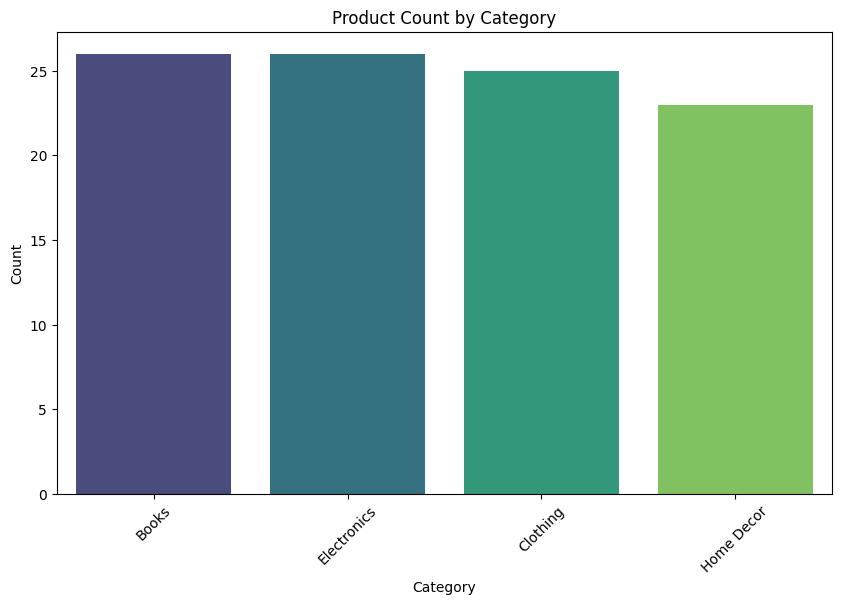

In [37]:
# Step 5: Visualization
# 1. Bar plot for product counts by category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Product Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


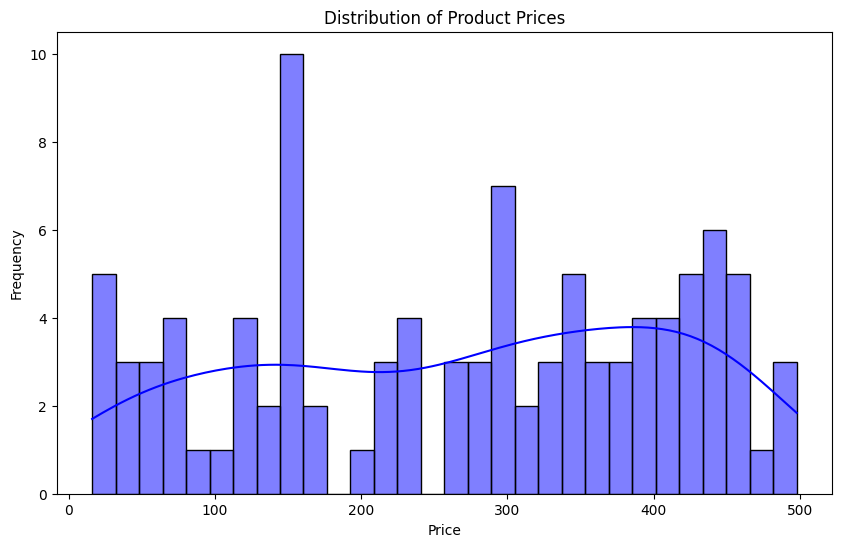

In [38]:
# 2. Histogram for product prices
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

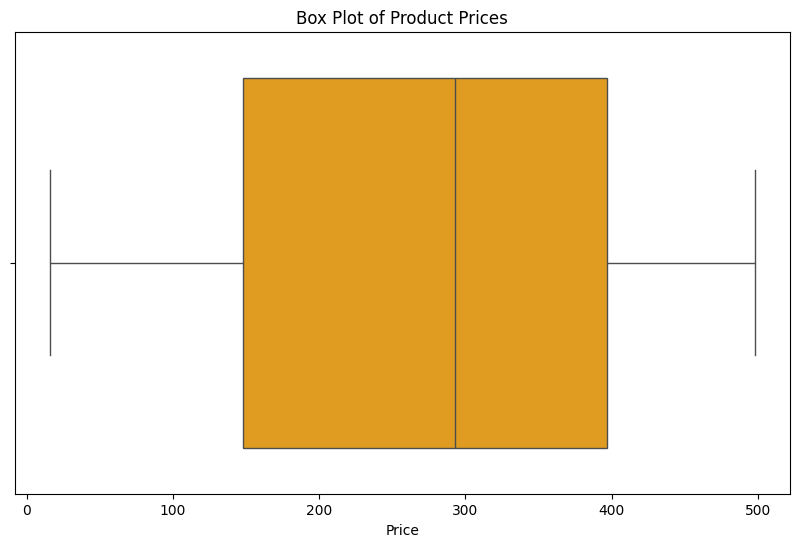

In [39]:
# 3. Box plot for product prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=products['Price'], color='orange')
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

Insight 1: The majority of products belong to the Books & Electronics category, suggesting a strong focus in this area.

Insight 2: The average product price is 267.55, with the highest-priced product at $497.76.

Insight 3: Certain categories have significantly fewer products, indicating opportunities for diversification.

Insight 4: There are no price outliers.

Insight 5: The price distribution is positively skewed, with most products priced below $500.


3. EDA for Transactions.csv

In [40]:
# Load the Transactions dataset
transactions = pd.read_csv('Transactions.csv')

In [41]:
# Display the first few rows
print("\nFirst Few Rows:")
print(transactions.head())


First Few Rows:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [42]:
# Step 2: Data Overview
print("\nDataset Information:")
print(transactions.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [43]:
print("\nNull Values Count:")
print(transactions.isnull().sum())


Null Values Count:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [44]:
print("\nSummary Statistics:")
print(transactions.describe())


Summary Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [45]:
# Check for duplicate rows
duplicates = transactions.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [46]:
# Step 3: Analyze Key Metrics
# Total number of transactions
total_transactions = transactions['TransactionID'].nunique()
print(f"\nTotal Number of Transactions: {total_transactions}")


Total Number of Transactions: 1000


In [47]:
# Total number of unique customers
total_customers = transactions['CustomerID'].nunique()
print(f"Total Number of Unique Customers: {total_customers}")

Total Number of Unique Customers: 199


In [48]:
# Most purchased product
most_purchased_product = transactions['ProductID'].value_counts().idxmax()
print(f"Most Purchased Product: {most_purchased_product}")


Most Purchased Product: P059


In [49]:
# Average and maximum quantities purchased
average_quantity = transactions['Quantity'].mean()
max_quantity = transactions['Quantity'].max()
print(f"Average Quantity Purchased: {average_quantity:.2f}")
print(f"Maximum Quantity Purchased: {max_quantity}")

Average Quantity Purchased: 2.54
Maximum Quantity Purchased: 4


In [50]:
# Total revenue
total_revenue = transactions['TotalValue'].sum()
print(f"Total Revenue Generated: ${total_revenue:.2f}")

Total Revenue Generated: $689995.56


In [51]:
# Step 4: Time-Series Analysis
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [52]:
# Monthly transaction trends
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_trends = transactions['Month'].value_counts().sort_index()

In [54]:
print(monthly_trends)

Month
1     107
2      77
3      80
4      86
5      86
6      69
7      96
8      94
9      96
10     70
11     57
12     82
Name: count, dtype: int64


In [53]:
# Step 5: Price and Value Analysis
# Price consistency check
price_check = (transactions['Quantity'] * transactions['Price'] == transactions['TotalValue']).all()
print(f"\nPrice Consistency Check: {'Passed' if price_check else 'Failed'}")


Price Consistency Check: Failed


<ipython-input-59-d0becaf37fd5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')


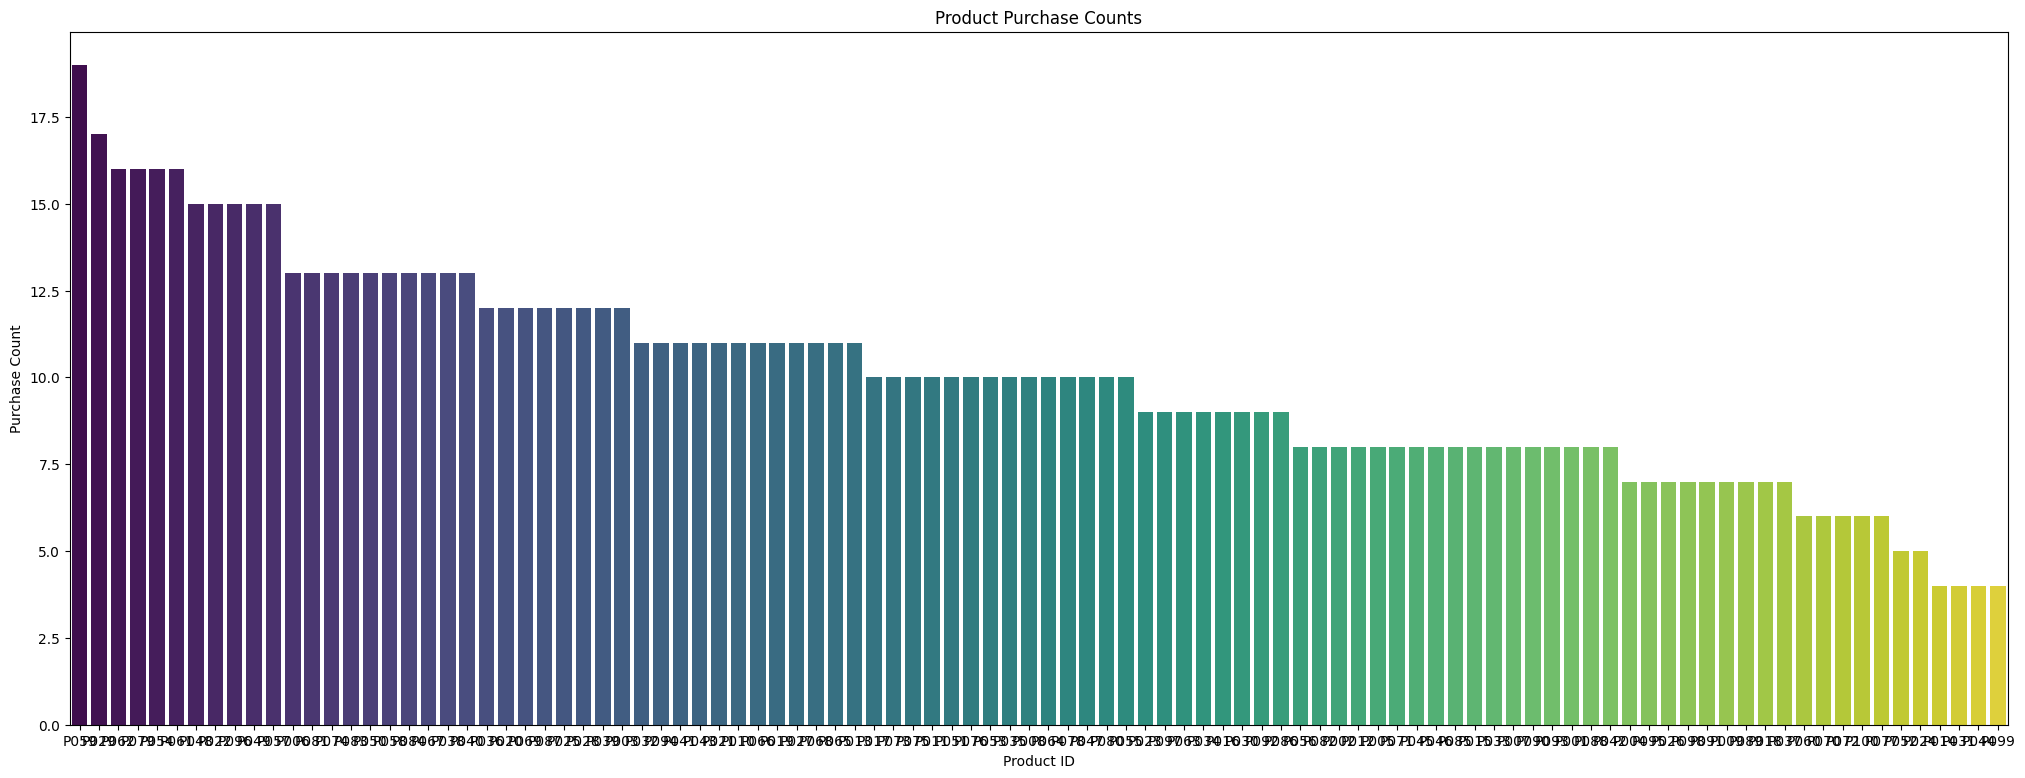

In [59]:
# Step 6: Visualizations
# 1. Bar plot for product purchase counts
plt.figure(figsize=(25, 9))
product_counts = transactions['ProductID'].value_counts()
sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')
plt.title('Product Purchase Counts')
plt.xlabel('Product ID')
plt.ylabel('Purchase Count')
plt.show()

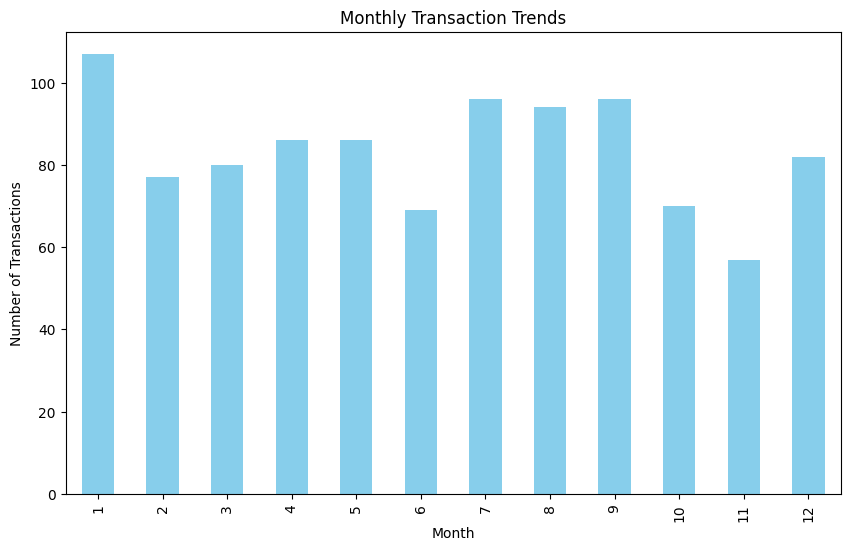

In [60]:
# 2. Monthly transaction trends
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

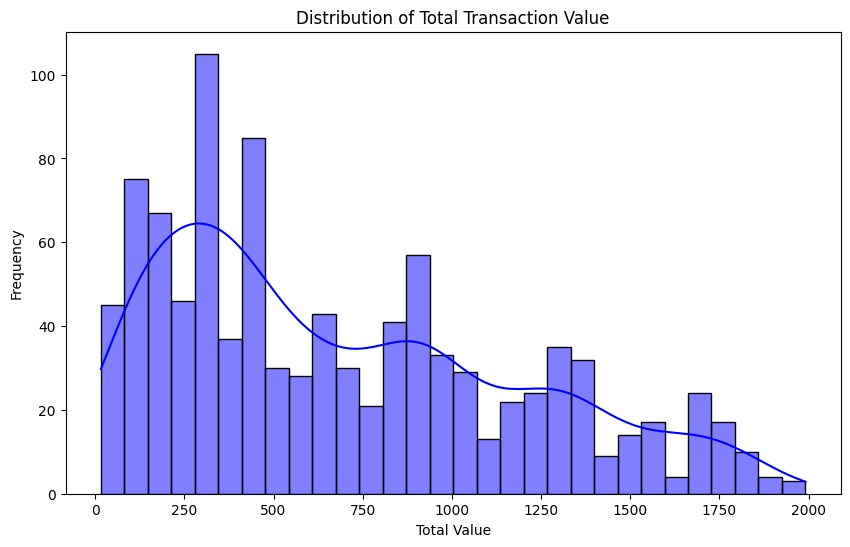

In [61]:
# 3. Histogram for the distribution of TotalValue
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

Insight 1: The most frequently purchased product is Product ID P059, accounting for a significant share of transactions.

Insight 2: The average quantity per transaction is 2.54, with a maximum purchase quantity of 4.

Insight 3: Revenue generated from all transactions is $689995.56.

Insight 4: Transaction activity peaks in certain months (e.g., January), indicating seasonal demand.

Insight 5: Pricing and total value calculations are consistent across the dataset.
